# Introduction to Machine Learning

The first cells are already filled in. They import packages, load the data, and include functions for data visualization. 

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import style; style.use('ggplot');

In [2]:
# load data
data = pd.read_csv('exam_scores.csv')
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# set up features and labels
X = data.values[:, [0, 1]]
y = data.values[:, -1]
m = y.size

In [17]:
def plot_data():
    """ Plots data """
    # shape 
    plt.rcParams['figure.figsize'] = [6, 5]
    
    # admitted: green, denied: red
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn')
    
    # label and show plot
    plt.title('Exam Scores vs Admittance')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    
    plt.show()
    
    return None

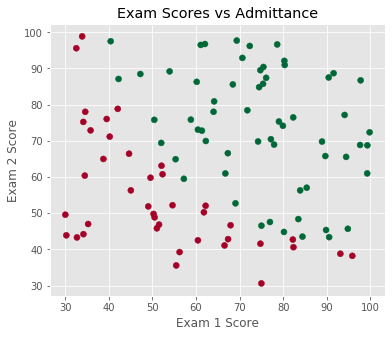

In [18]:
plot_data()

In [19]:
def decision_boundary(clf):
    """ Plots decision boundary given a classifier """
    # shape 
    plt.rcParams['figure.figsize'] = [6, 5]
    
    # entire grid
    X1, X2 = np.meshgrid(np.arange(start=min(X[:, 0]), stop=max(X[:, 0]), step=0.1),
                         np.arange(start=min(X[:, 1]), stop=max(X[:, 1]), step=0.1))
    
    # plot predictions
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('lightpink', 'lightgreen')))
    
    # show original data on top
    plot_data()
    
    return None

# Your turn! Make some classifiers and test them out.
In every cell, you should:
- import the classifier from sklearn
- create an instance of the classifier
- fit the classifier
- make predictions with the decision boundary function

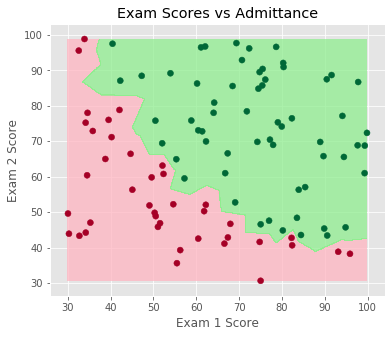

In [26]:
# make KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
decision_boundary(knn)

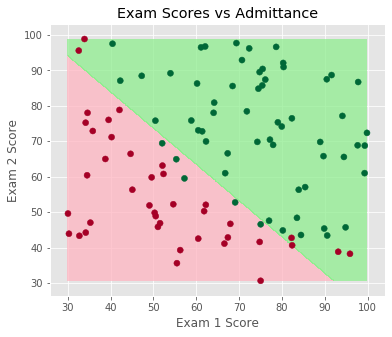

In [21]:
# make logistic regression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)
decision_boundary(log_reg)

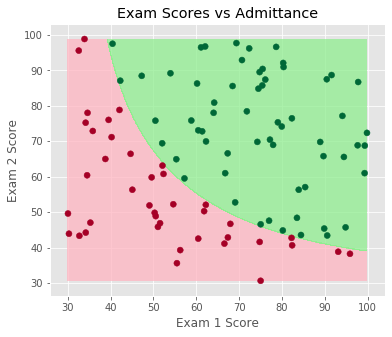

In [22]:
# make SVM classifier
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=2, gamma='auto')
svm.fit(X, y)
decision_boundary(svm)

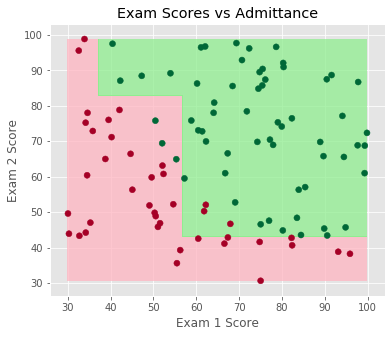

In [23]:
# make decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)
decision_boundary(tree)

The next cell will not run unless the GraphViz package is installed. This does not come with anaconda. In terminal type:
```console
conda install -c anaconda python-graphviz 
```
Or, don't install graphviz, don't run the cell, and just follow along on screen!

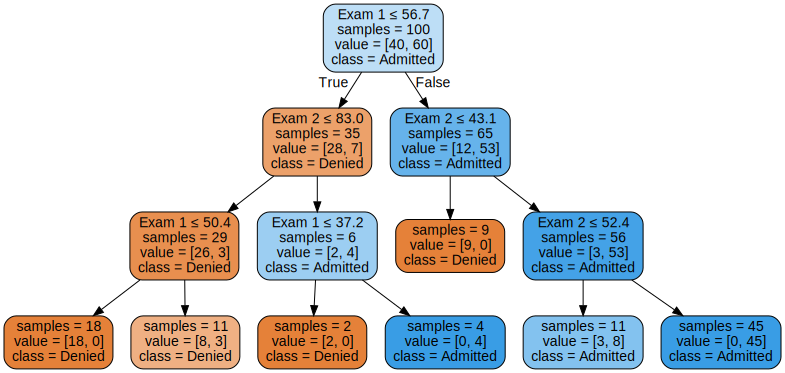

In [11]:
# functionality to see tree diagram
from sklearn.tree import export_graphviz; import graphviz
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=['Exam 1', 'Exam 2'], 
                           class_names=['Denied', 'Admitted'],
                           filled=True, rounded=True, special_characters=True, 
                           impurity=False, precision=1) 
graphviz.Source(dot_data)  

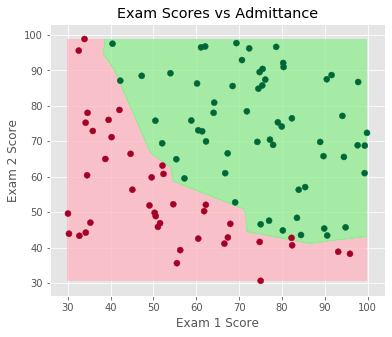

In [25]:
# make neural net
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(25,), max_iter=10000)
nn.fit(X, y)
decision_boundary(nn)